# **Import Modules**

In [1]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pylab as plt
import random

# **Loading the dataset**

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


# **Overview of the Images**

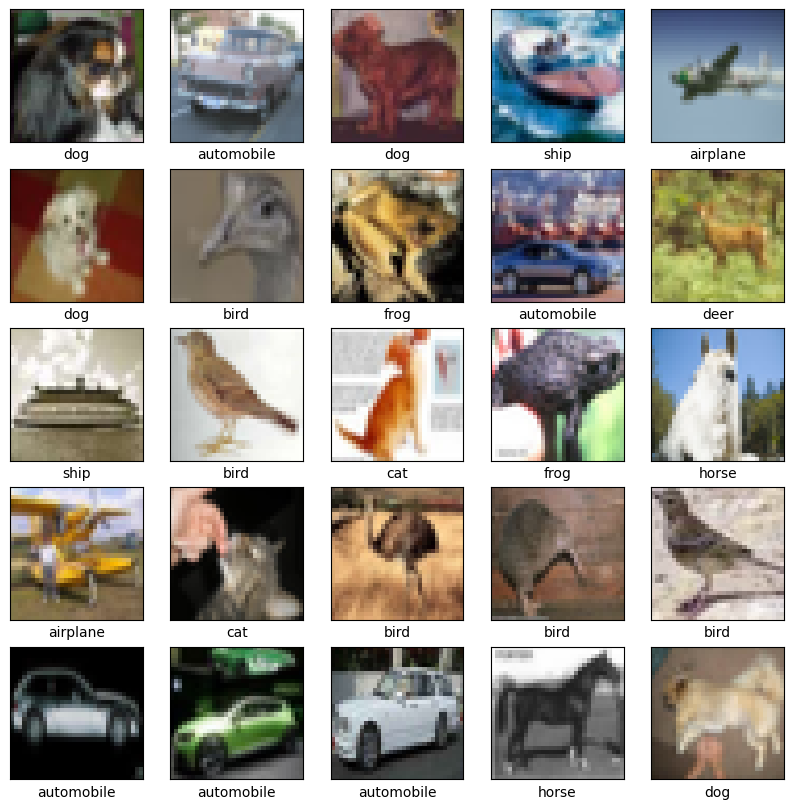

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

train_idx = list(range(len(train_labels)))

random.seed(1)
random_sample = random.sample(train_idx, 25)

plt.figure(figsize=(10,10))
for i in range(len(random_sample)):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[random_sample[i]], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[random_sample[i]][0]])
plt.show()

# **Build, Compile, and Train the Model**

In [5]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
validation_dataset = tf.data.Dataset.from_tensor_slices((test_images[:5000], test_labels[:5000]))
test_dataset = tf.data.Dataset.from_tensor_slices((test_images[5000:], test_labels[5000:]))

TRAIN_DATASET_SIZE = len(train_dataset)
VALIDATION_DATASET_SIZE = len(validation_dataset)
TEST_DATASET_SIZE = len(test_dataset)

BATCH_SIZE = 128

train_dataset = train_dataset.shuffle(TRAIN_DATASET_SIZE).batch(BATCH_SIZE)
validation_dataset = validation_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)


#build
model_handle = 'https://tfhub.dev/deepmind/ganeval-cifar10-convnet/1'
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(32,32) + (3,)),
    tf.keras.layers.Lambda(hub.KerasLayer(model_handle, trainable=False))
  ])

<Sequential name=sequential_1, built=True>

In [6]:

#compile
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#No training required

#Evaluate
_, accuracy = model.evaluate(test_dataset)
print(f'The model accuracy is {accuracy * 100:0.1f}%')

40/40 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.9435 - loss: 0.1992
The model accuracy is 94.5%


# **make Predictions**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
automobile


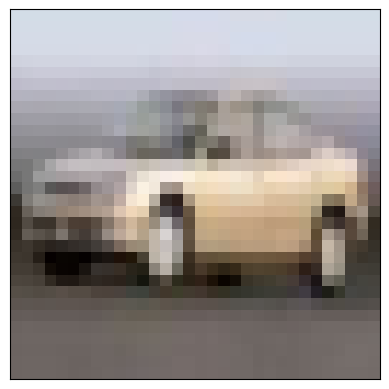

In [7]:
image_id = 7260 #Pick an image id between 5000 and 9999 inclusive

def get_prediction(image_id):
  img = test_images[image_id]
  img = np.expand_dims(img, 0)
  pred = model.predict(img)
  pred = np.argmax(pred)
  print(class_names[pred])
  plt.figure()
  plt.imshow(test_images[image_id], cmap=plt.cm.binary)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.show()

get_prediction(image_id)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


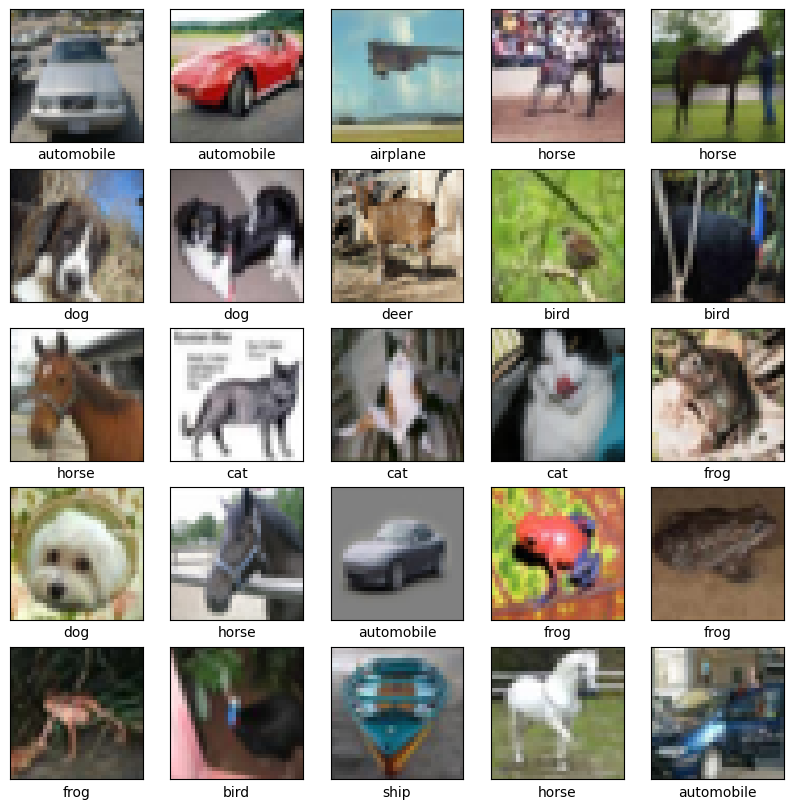

In [8]:
test_idx = list(range(5000,10000))

random.seed(1)
random_sample = random.sample(test_idx, 25)

def get_pred_id(image_id):
  img = test_images[image_id]
  img = np.expand_dims(img, 0)
  pred = model.predict(img)
  pred = np.argmax(pred)
  return pred

pred_labels = [get_pred_id(i) for i in random_sample]


plt.figure(figsize=(10,10))
for i in range(len(random_sample)):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[random_sample[i]], cmap=plt.cm.binary)
    #plt.xlabel(class_names[test_labels[random_sample[i]][0]])
    plt.xlabel(class_names[pred_labels[i]])

plt.show()